# Practical denoising with Aydin

After the simple example with a photograph, we look now at an example from micorscopy. The image used here is from the OpenCell project where series of proteins have been tagged and then imaged as z-stacks. As some proteins have low abundance, their signal might be weak and denoising can be helpful in such cases.

In [19]:
import skimage.io
from microfilm.microplot import microshow

In [21]:
image = skimage.io.imread('../data/OC-FOV_ARHGAP21_ENSG00000107863_CID000556_FID00024477_stack.tiff')

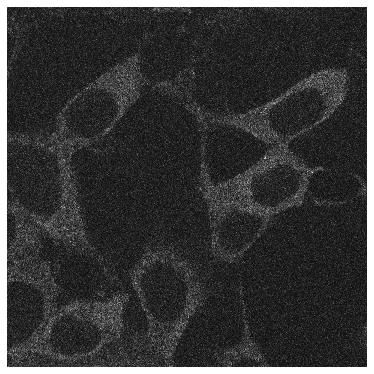

In [25]:
microshow(image[50,1,:,:], fig_scaling=5);

As we can see above the intensity is very low, which is especially visible if we zoom in:

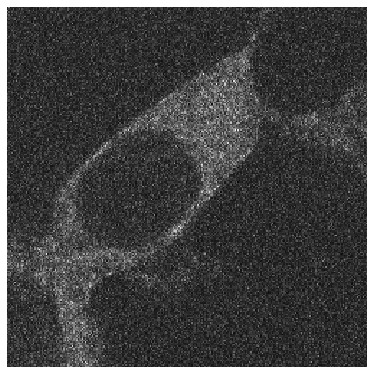

In [28]:
microshow(image[50,1,50:300,50:300], fig_scaling=5);

## Denoising

Let's denoise this image with the default denoisier. First we rescale the image between 0-1:

In [43]:
from aydin.restoration.denoise.classic import Classic
from aydin.it.transforms.range import RangeTransform

In [45]:
rg_tf = RangeTransform()

In [59]:
im_rg = rg_tf.preprocess(image[48:52,1,:,:])

In [61]:
classic_restoration = Classic()
classic_restoration.train(im_rg)
denoised_image = classic_restoration.denoise(im_rg)

Callback for minimizer starting at [0.1796875 0.3046875 0.3515625]:
Callback for minimizer starting at [0.7265625 0.9453125 0.0859375]:


/Users/gw18g940/mambaforge/envs/micpy/lib/python3.9/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Callback for minimizer starting at [0.1875 0.3125 0.9375]:
Callback for minimizer starting at [0.21875 0.84375 0.09375]:


/Users/gw18g940/mambaforge/envs/micpy/lib/python3.9/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Callback for minimizer starting at [0.46875 0.09375 0.84375]:
Callback for minimizer starting at [0.703125 0.109375 0.171875]:


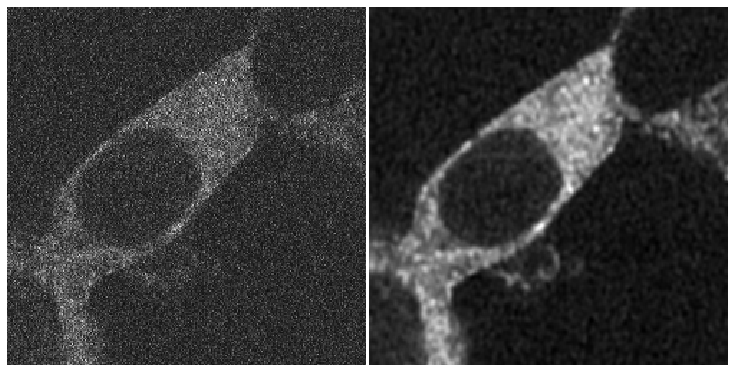

In [75]:
from microfilm.microplot import Micropanel
panel = Micropanel(1,2)
panel.add_element([0,0],microshow(im_rg[2, 50:300,50:300], fig_scaling=5, ax=panel.ax[0,0]))
panel.add_element([0,1],microshow(denoised_image[2, 50:300,50:300],ax=panel.ax[0,1], fig_scaling=5))